# <span style = "color:green"> Body Fat Predicion</span>

***

### Context

Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

### Content

This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

### Attributes

The variables listed below, from left to right, are:

* Density determined from underwater weighing
* Percent body fat from Siri's (1956) equation
* Age (years)
* Weight (lbs)
* Height (inches)
* Neck circumference (cm)
* Chest circumference (cm)
* Abdomen 2 circumference (cm)
* Hip circumference (cm)
* Thigh circumference (cm)
* Knee circumference (cm)
* Ankle circumference (cm)
* Biceps (extended) circumference (cm)
* Forearm circumference (cm)
* Wrist circumference (cm)


Find the dataset <a href = "https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset">here</a>

### Import Necessary Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

### Read 'bodyfat.csv'

In [5]:
df = pd.read_csv('bodyfat.csv')

In [6]:
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

### Check info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


### View basic statistical information

In [8]:
df.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

### Check for null values

In [9]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

### Check for duplicates

In [10]:
df.duplicated().sum()

0

### Plot distribution plots of all the features

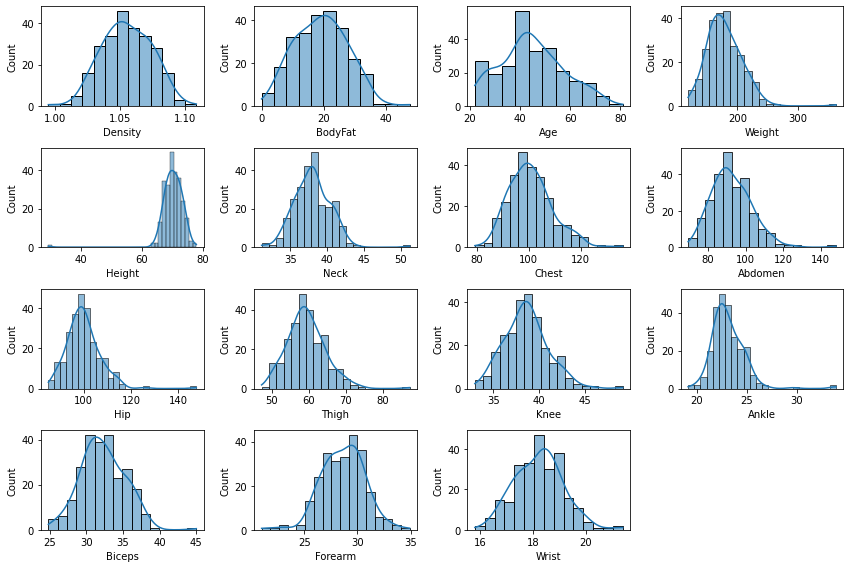

In [17]:
plt.figure(figsize = (12,8))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sns.histplot(df[df.columns[i]], kde = True)
plt.tight_layout()

### Plot pairplot of dataset

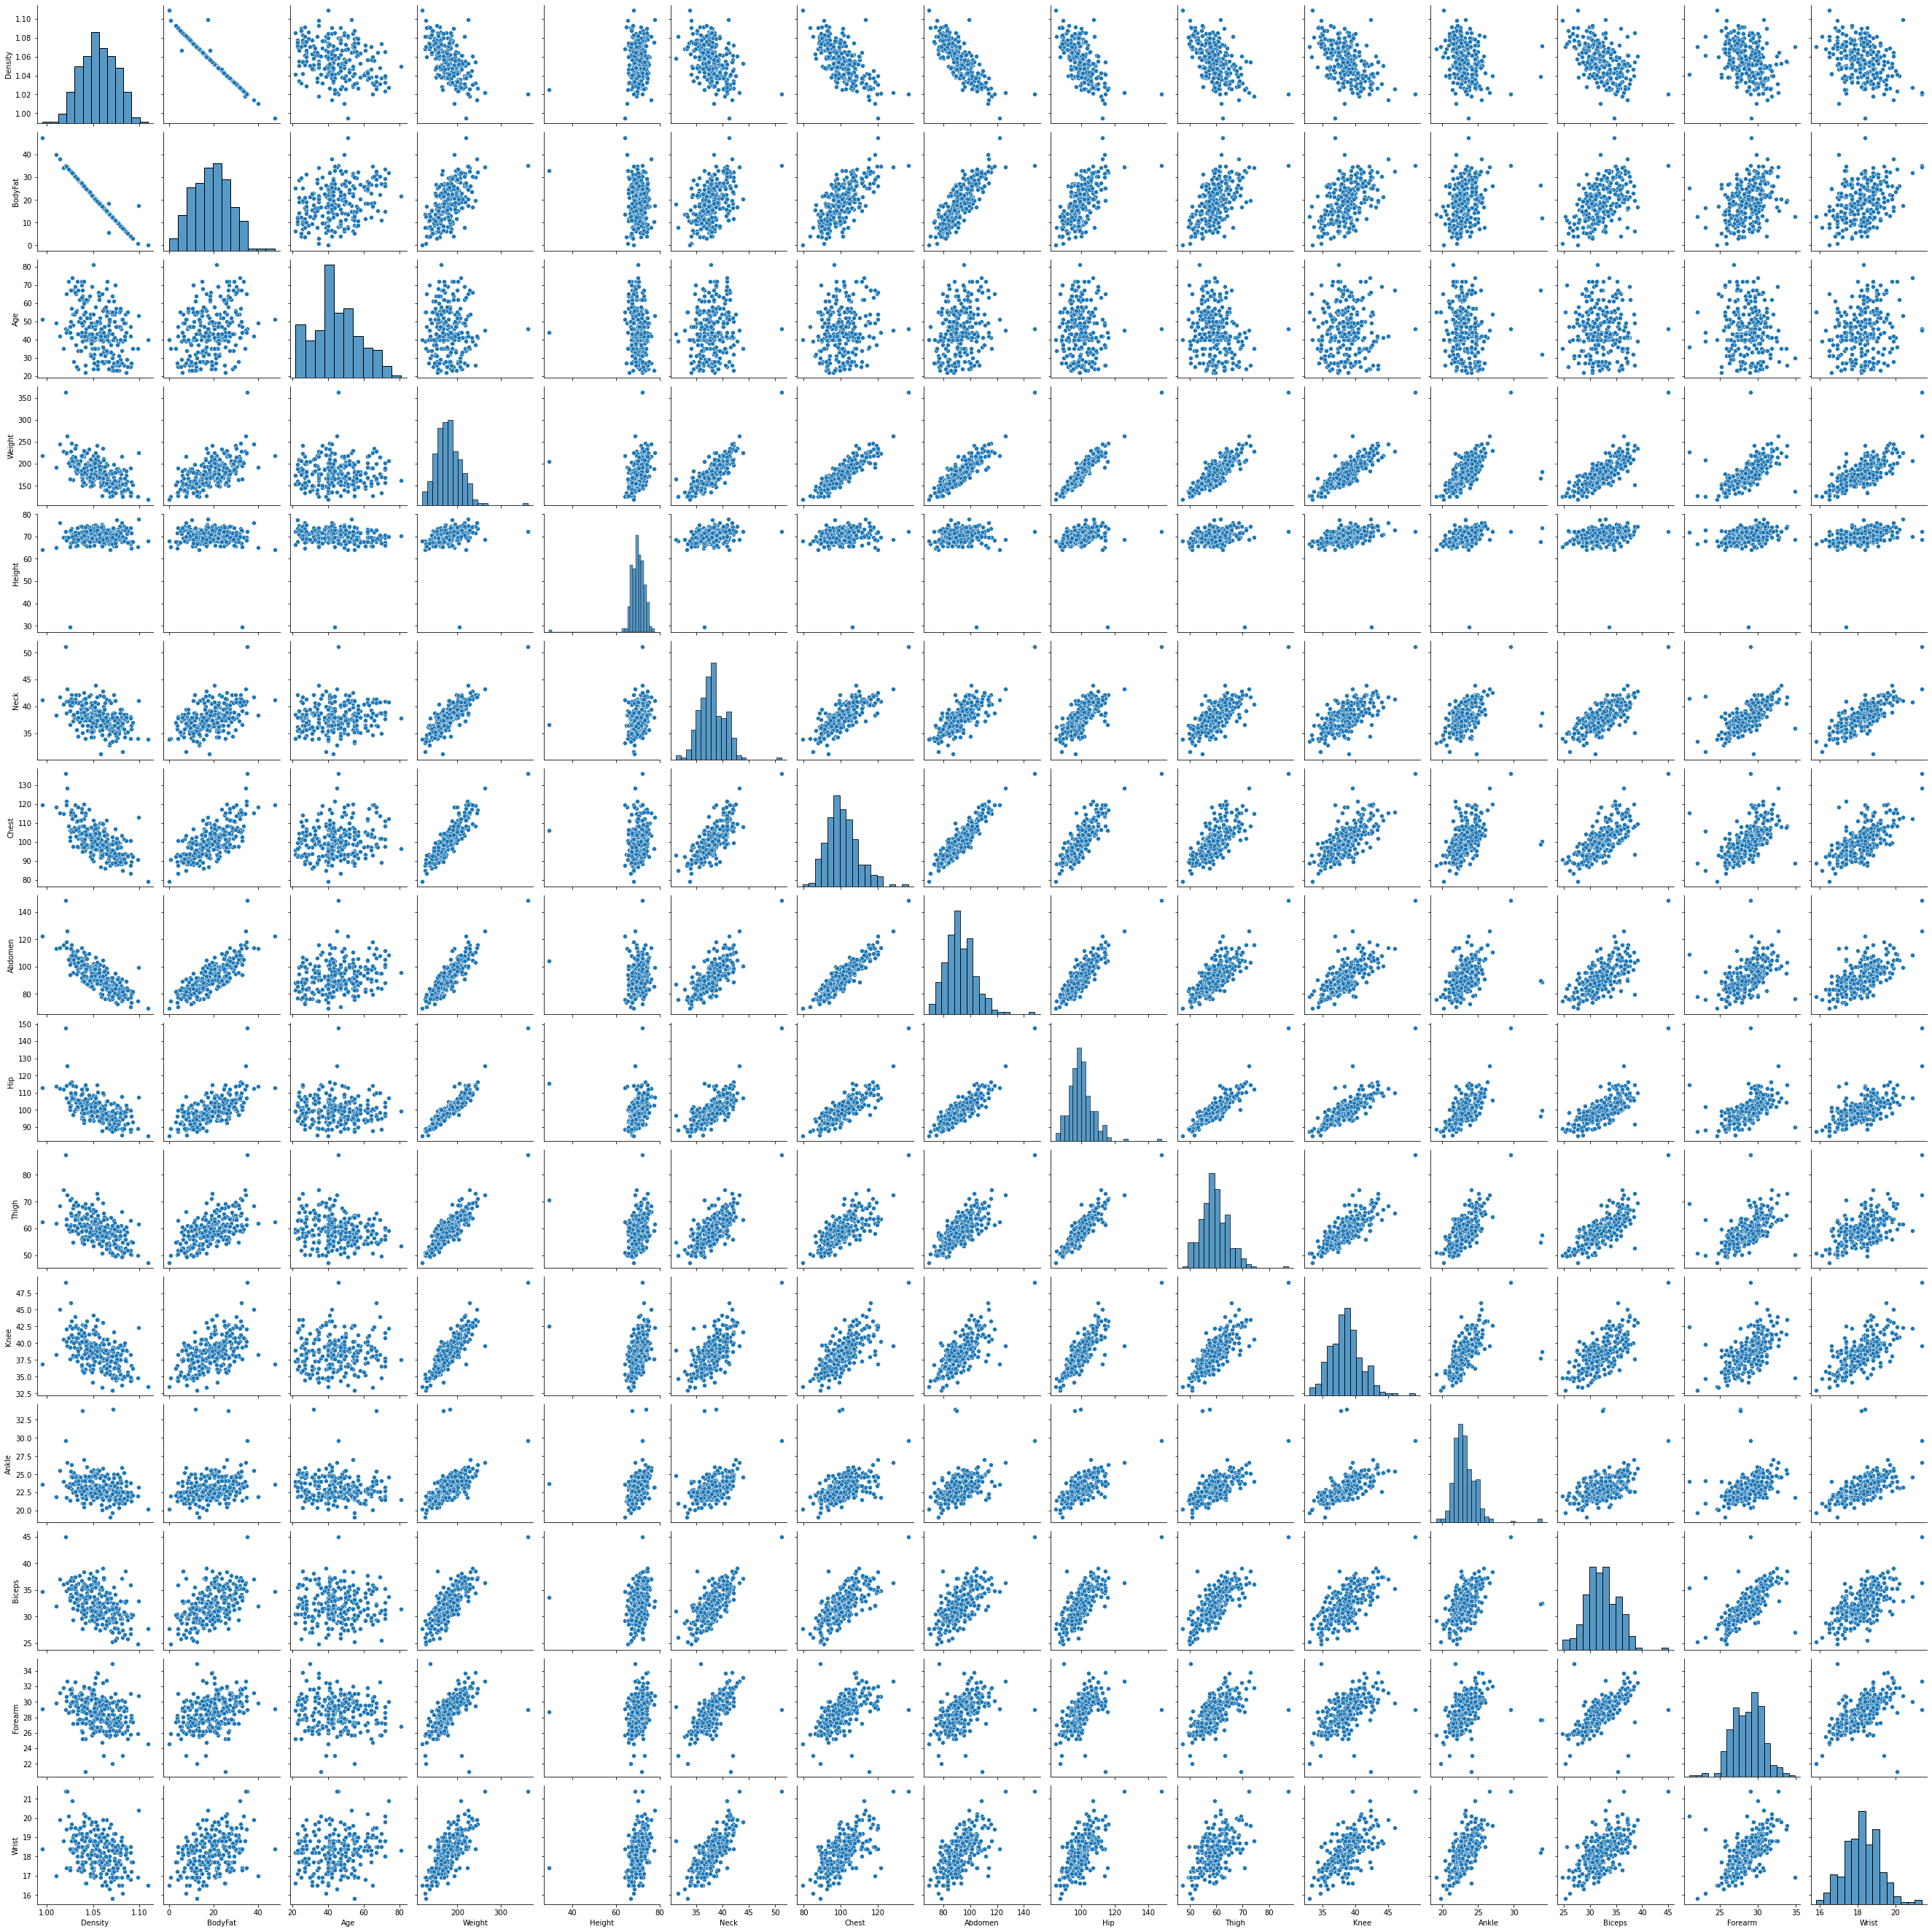

In [18]:
sns.pairplot(df)
plt.show()

### Plot correlation matrix on heatmap

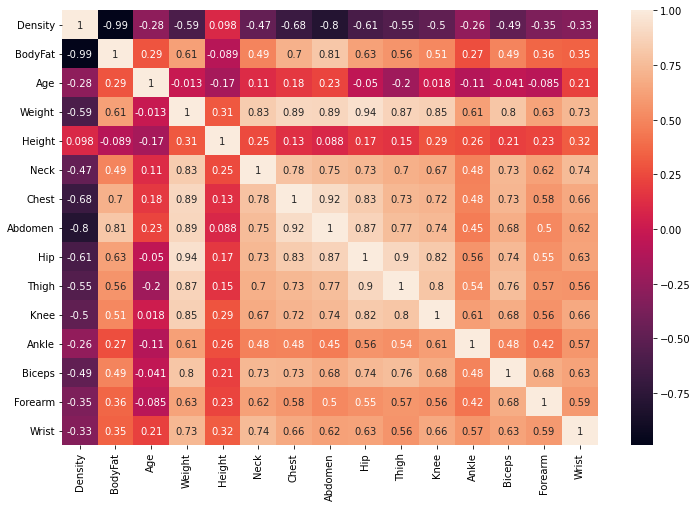

In [21]:
plt.figure(figsize =(12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Split the dataset into Input & Target Variables

In [22]:
X = df.drop(columns = ['BodyFat'])
y = df['BodyFat']

### Standardize the input variables with Standard Scaler

In [23]:
scaler = StandardScaler()

In [26]:
X = pd.DataFrame(scaler.fit_transform(X), columns =X.columns)

In [27]:
X.head()

Density       Age    Weight    Height      Neck     Chest   Abdomen  \
0  0.801647 -1.740073 -0.841246 -0.656205 -0.738665 -0.918048 -0.683533   
1  1.565061 -1.819583 -0.193462  0.574790  0.209365 -0.858621 -0.887963   
2 -0.746240 -1.819583 -0.849769 -1.066536 -1.645475 -0.597144 -0.432643   
3  1.028039 -1.501543  0.198617  0.574790 -0.244041  0.115976 -0.572026   
4 -1.135844 -1.660563  0.181570  0.301235 -1.480601 -0.418864  0.691719   

        Hip     Thigh      Knee     Ankle    Biceps   Forearm     Wrist  
0 -0.755929 -0.077479 -0.536131 -0.710826 -0.090676 -0.626718 -1.212541  
1 -0.168502 -0.134736 -0.536131  0.175947 -0.588143  0.117079 -0.031943  
2 -0.098570  0.037035  0.128592  0.530656 -1.151940 -1.717621 -1.749177  
3  0.181157  0.132464 -0.536131 -0.178762  0.041982  0.365012 -0.031943  
4  0.279061  0.724121  1.499585  0.530656 -0.024347 -0.477959 -0.568578

### Split the dataset into Training & Testing set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Create Linear Regression model & Train it

In [29]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(X_train, y_train)

LinearRegression()

### Check accuracy of training set

In [33]:
lr_model.score(X_train, y_train)

0.9786405155827257

### Make Predictions with X_test

In [34]:
y_pred = lr_model.predict(X_test)

### Evaluate the model

#### r2 score

In [37]:
r2_score(y_test, y_pred)

0.9740878151600517

#### Mean Squared Error

In [38]:
mean_squared_error(y_test,y_pred)

1.8004742416547916

### Create Random Forest Regressor & Train it

In [39]:
rf_model = RandomForestRegressor()

In [40]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

### Check score

In [41]:
rf_model.score(X_train, y_train)

0.9954706816388293

### Make predictions with X_test

In [42]:
y_pred = rf_model.predict(X_test)

### Evaluate the model

#### r2 Score

In [43]:
r2_score(y_test,y_pred)

0.9694744471498129

#### Mean Squared Error

In [44]:
mean_squared_error(y_test,y_pred)

2.121028078431371

***